In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
telecom_data = pd.read_csv("telecom.csv")
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telecom_data.shape

(7043, 21)

In [5]:
telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
telecom_data['Churn'] = telecom_data[['Churn']].replace({'Yes':'Churn','No':'Not Churned'})

####
 Dividing Payment methods into two categories - Automatic or Manual

This could be a good feature for our model.

Visualizing the correlation of certain features which may effect customer churn.

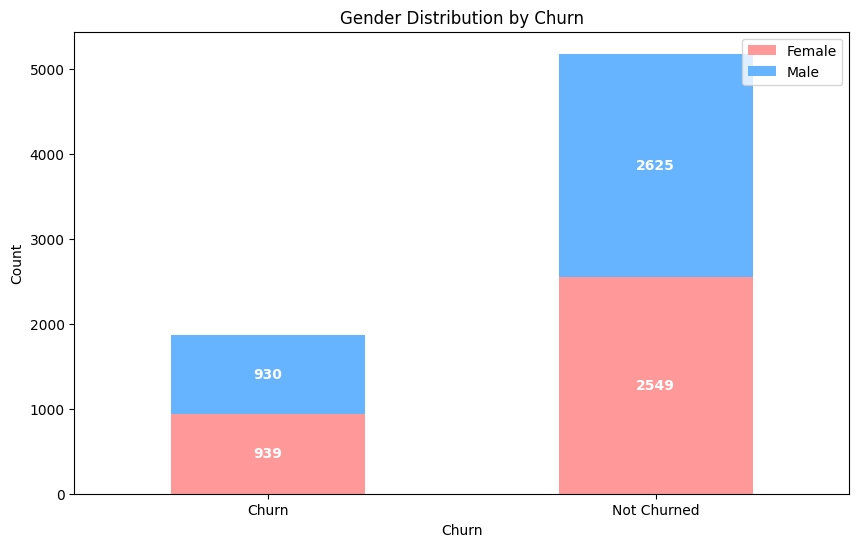

In [7]:
gender_churn_counts = telecom_data.groupby(['Churn','gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#ff9999', '#66b3ff']


bars = gender_churn_counts.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.title('Gender Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(['Female', 'Male'], loc='upper right')

for p in bars.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontweight='bold', color='white')

plt.show()


#### We can observe that gender is not that crucial feature to determine Churn probability.

For futher analysis lets make a similar function so we can reuse with different features. We will try to rectify some of the missing details in further visuals.

In [8]:
# Create subplots with 1 row and 2 columns
def plot_stacked_bar(column,data=telecom_data):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Stacked bar chart with counts
    axs[0].set_title(f'Churn Distribution by {column} (Counts)')
    axs[0].set_xlabel(f'{column}')
    axs[0].set_ylabel('Count')

    # Plotting the bar chart
    churn_counts = data.groupby([f'{column}', 'Churn']).size().unstack(fill_value=0)
    bars_counts = churn_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=axs[0])

    # Add total counts on top of each bar in the first plot
    for p in bars_counts.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        axs[0].text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontweight='bold', color='white')

    # Plot 2: Stacked bar chart with percentages
    axs[1].set_title(f'Churn Distribution by {column} (Percentages)')
    axs[1].set_xlabel(f'{column}')
    axs[1].set_ylabel('Percentage')

    # Plotting the bar chart with percentages
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    bars_percentages = churn_percentages.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=axs[1], alpha=0.5, legend=False)

    # Add percentage labels on top of each bar in the second plot
    for p in bars_percentages.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        axs[1].text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontweight='bold', color='black')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the plots
    plt.show()


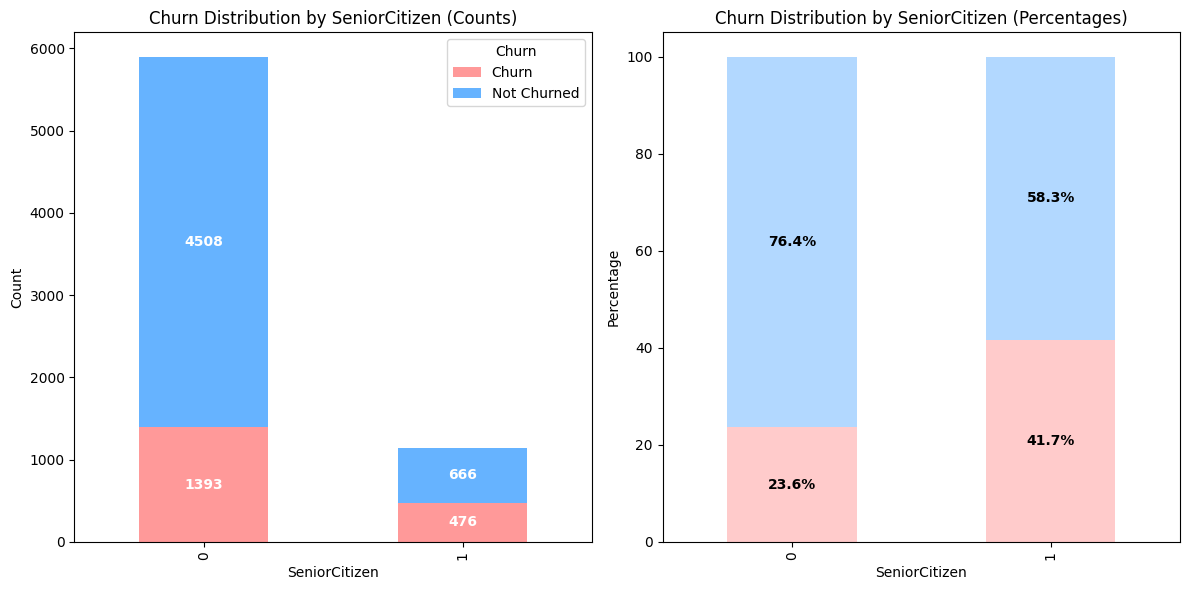

In [9]:
plot_stacked_bar('SeniorCitizen')

We can observe that the senior citizens are more likely to churn.

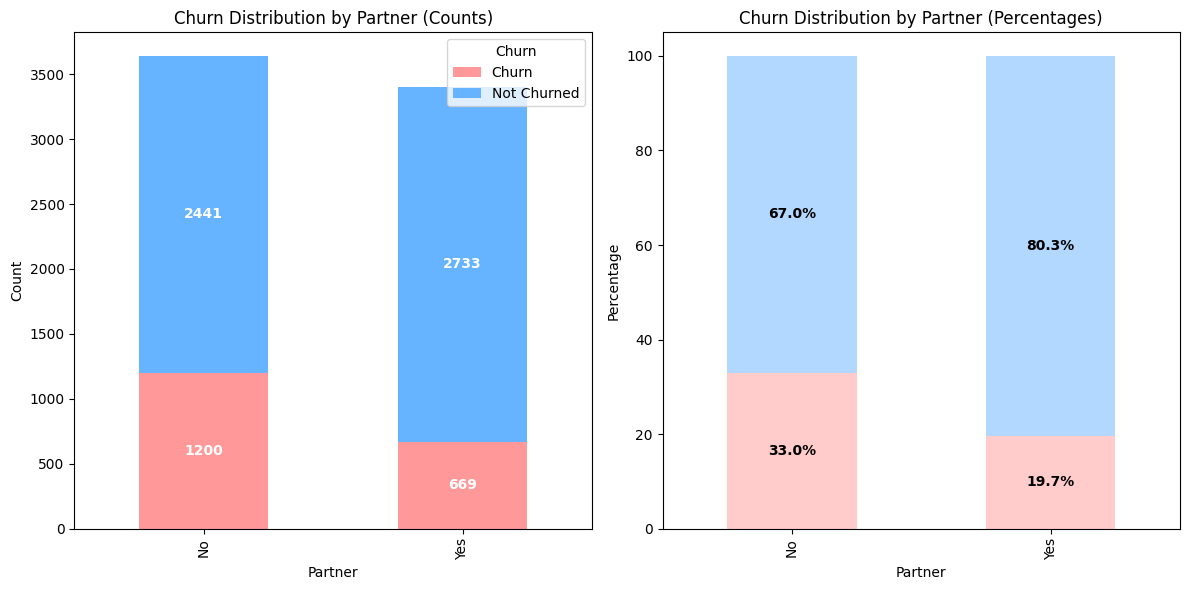

In [10]:
plot_stacked_bar('Partner')

The consumer without a partner is more likely to churn

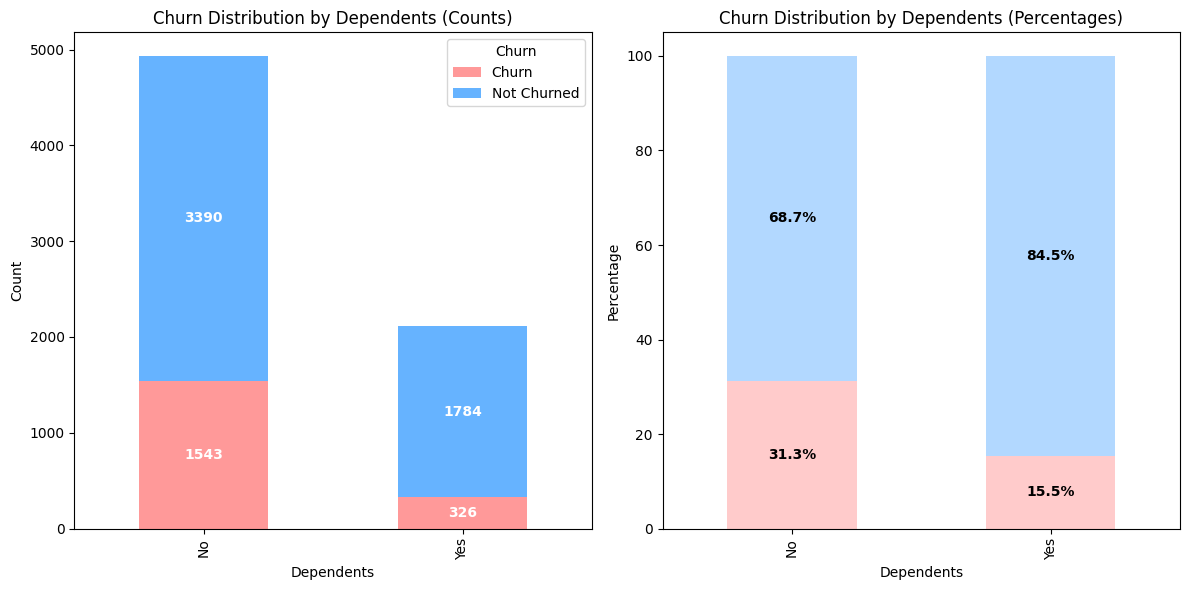

In [11]:
plot_stacked_bar('Dependents')

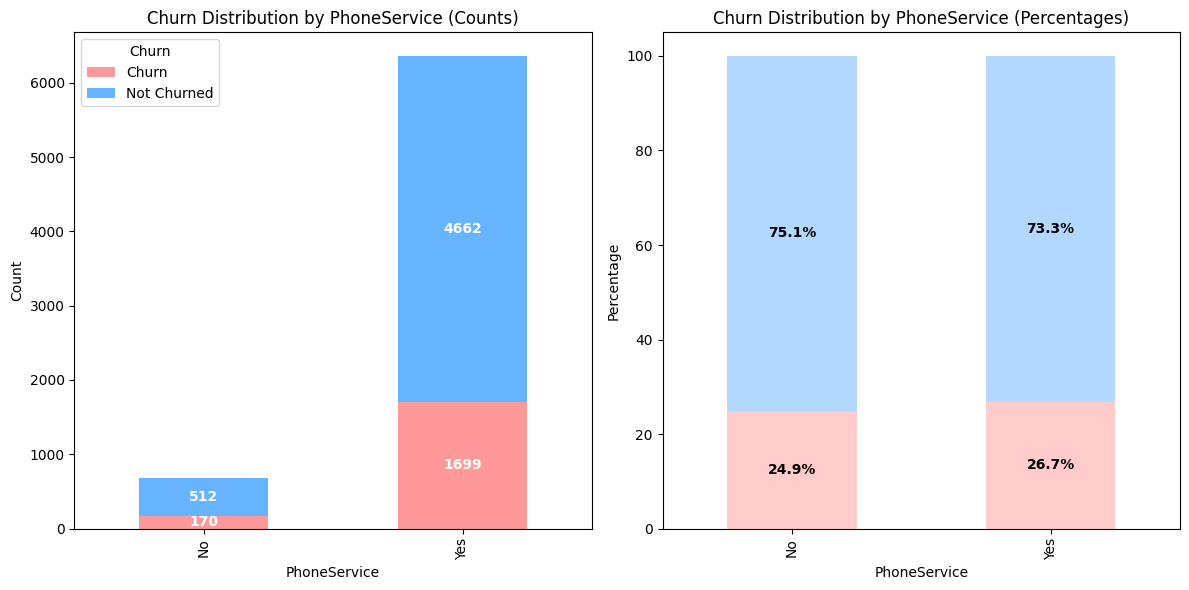

In [12]:
plot_stacked_bar('PhoneService')

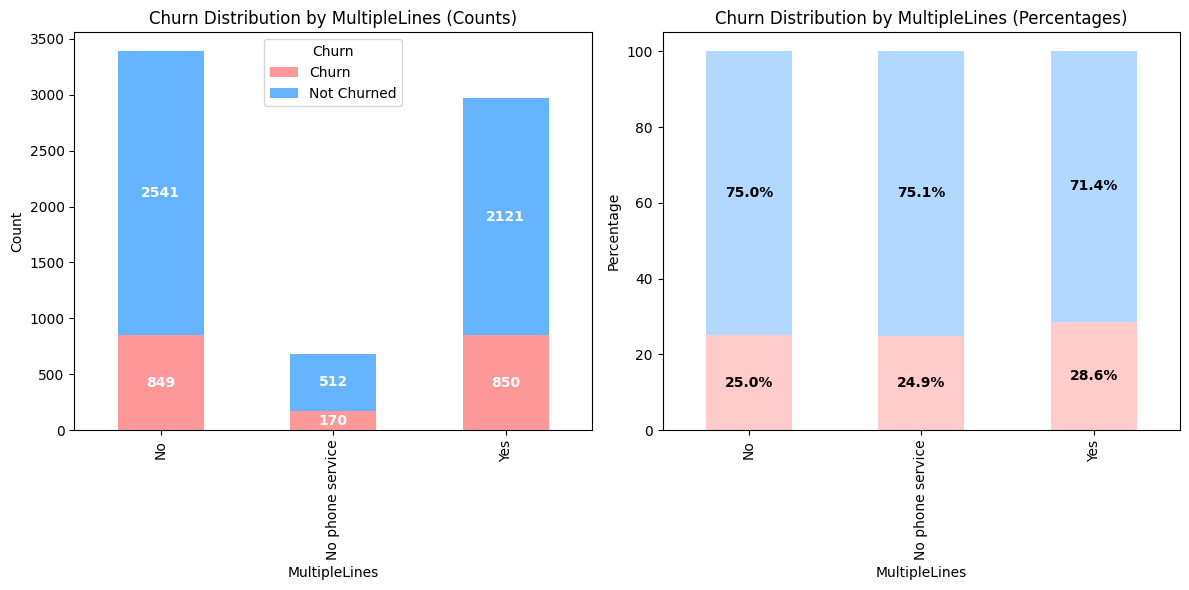

In [13]:
plot_stacked_bar('MultipleLines')

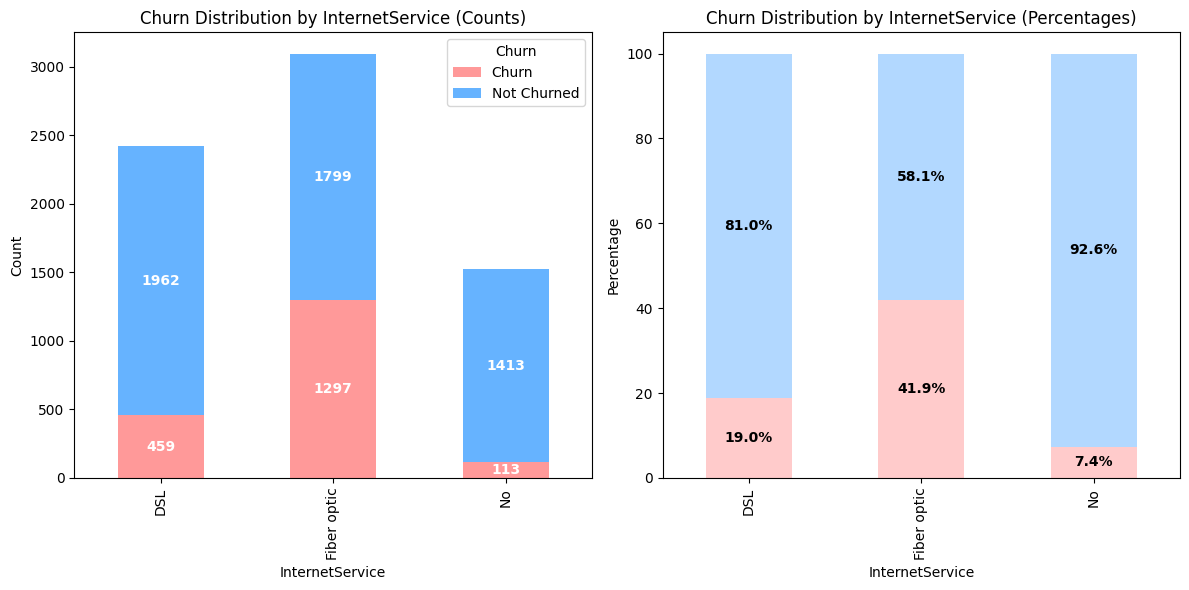

In [14]:
plot_stacked_bar('InternetService')

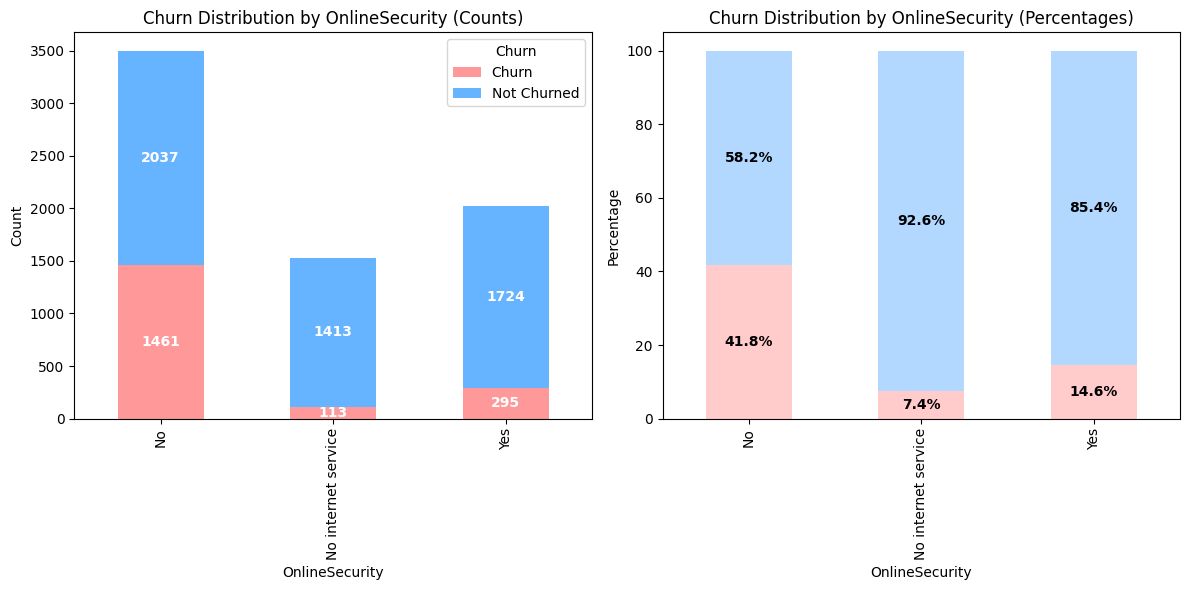

In [15]:
plot_stacked_bar('OnlineSecurity')

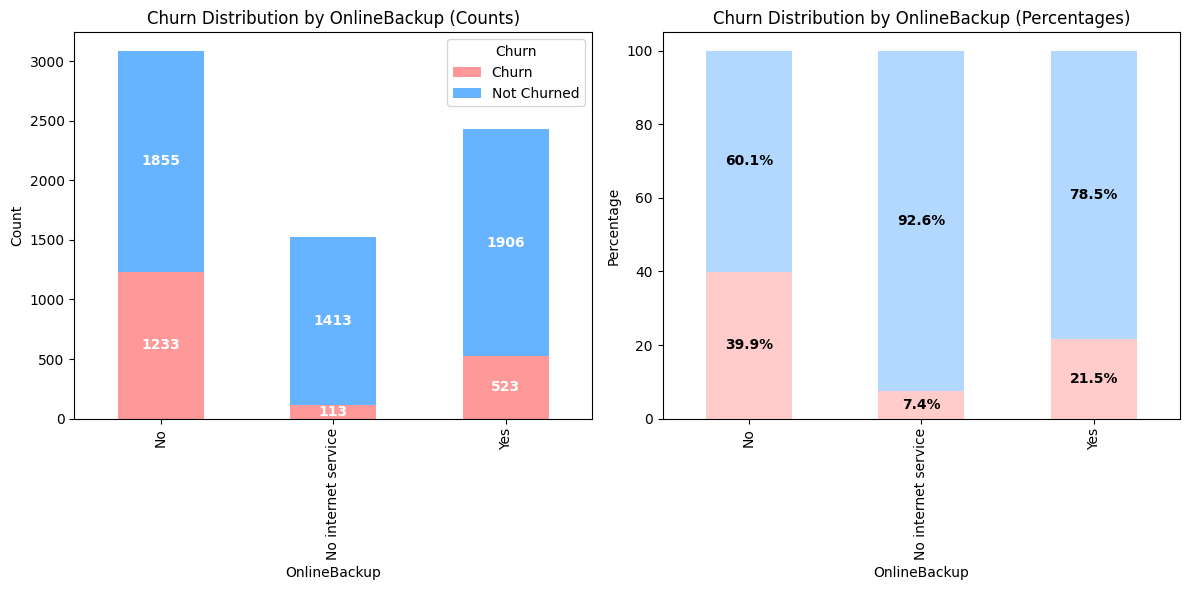

In [16]:
plot_stacked_bar('OnlineBackup')

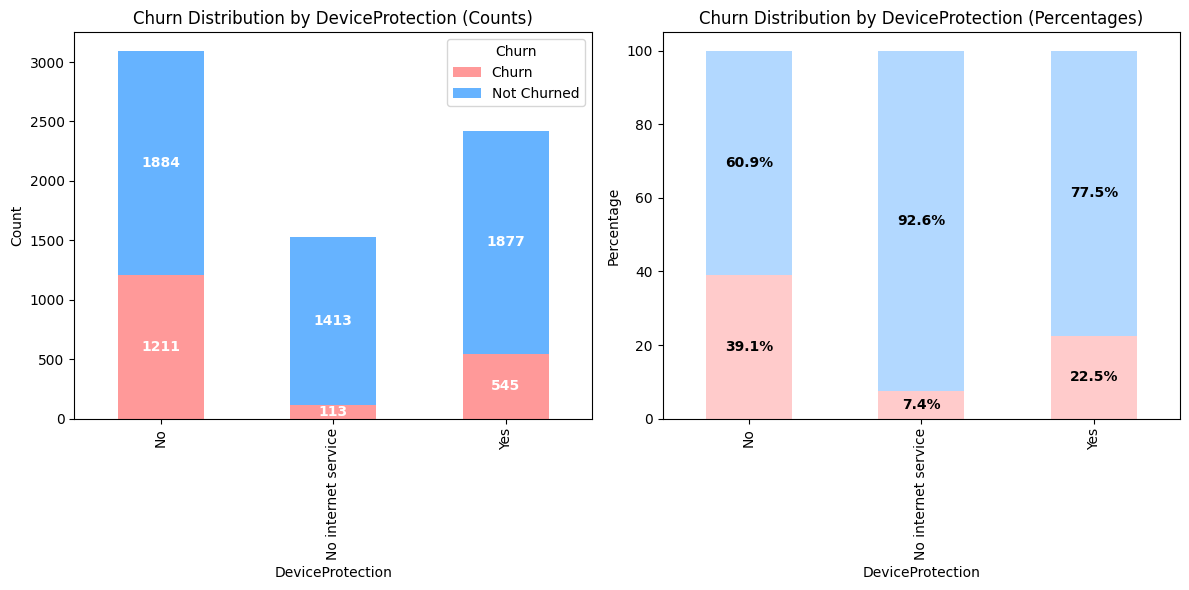

In [17]:
plot_stacked_bar('DeviceProtection')

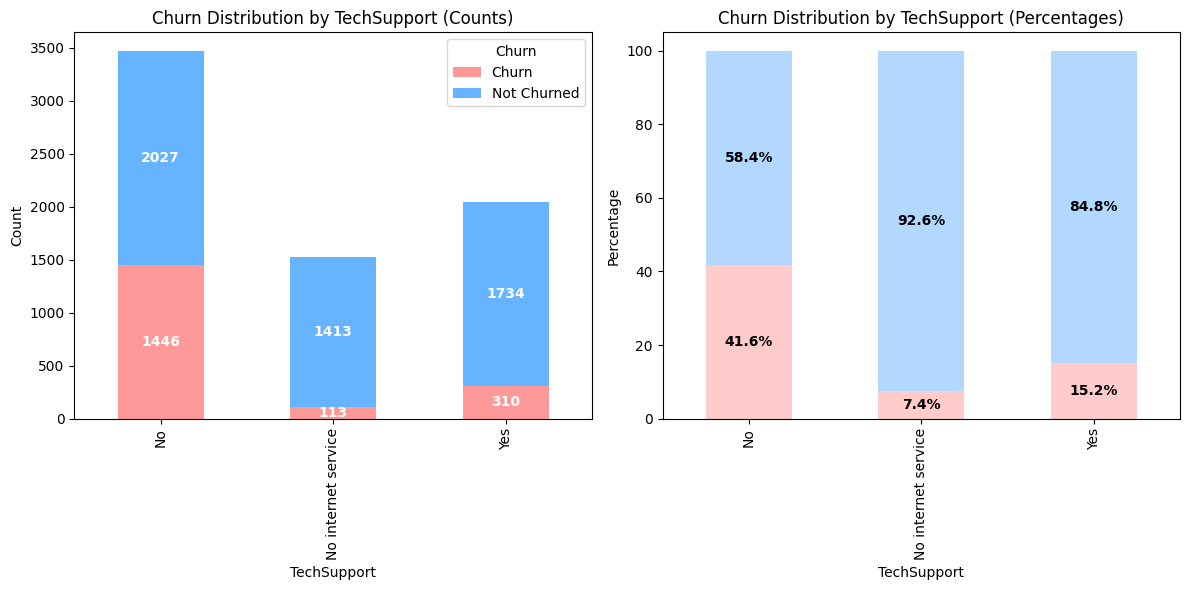

In [18]:
plot_stacked_bar('TechSupport')

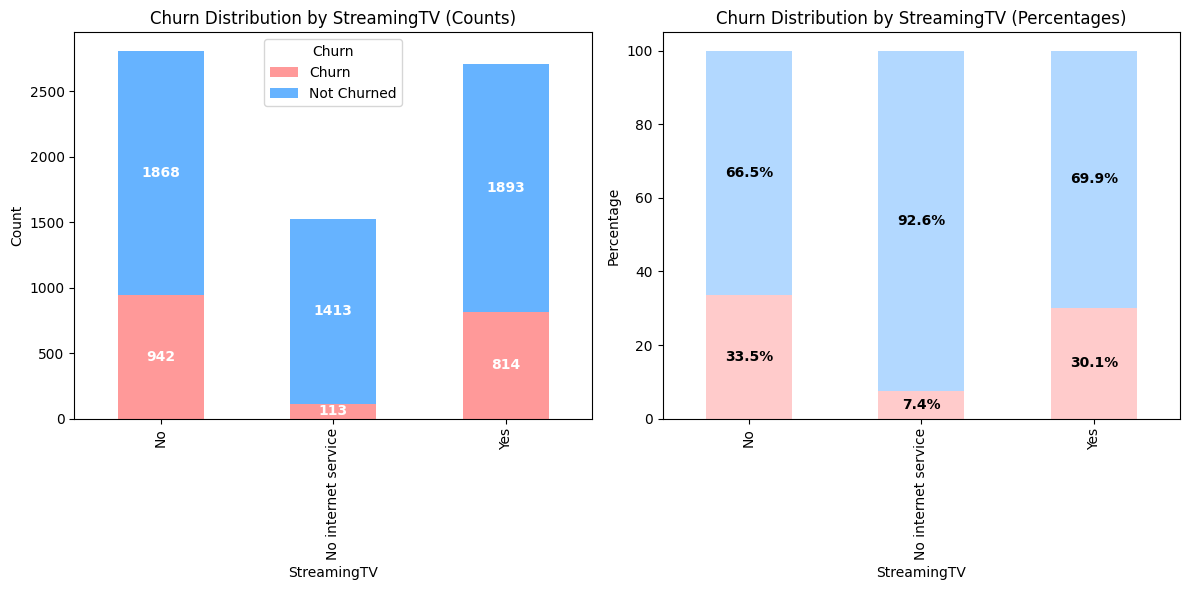

In [19]:
plot_stacked_bar('StreamingTV')

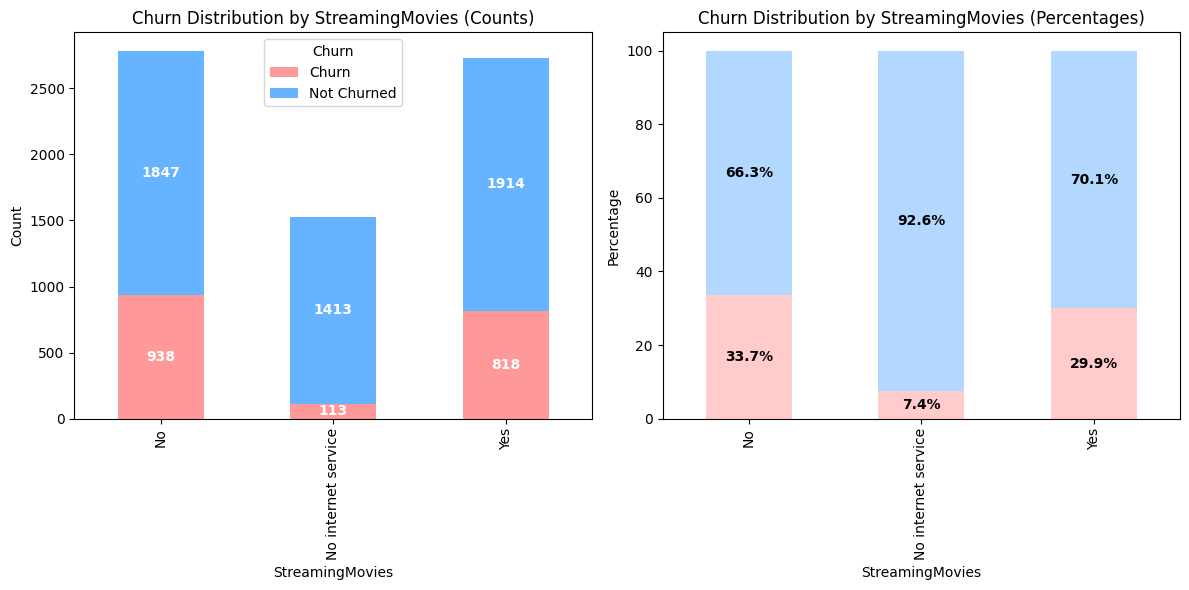

In [20]:
plot_stacked_bar('StreamingMovies')

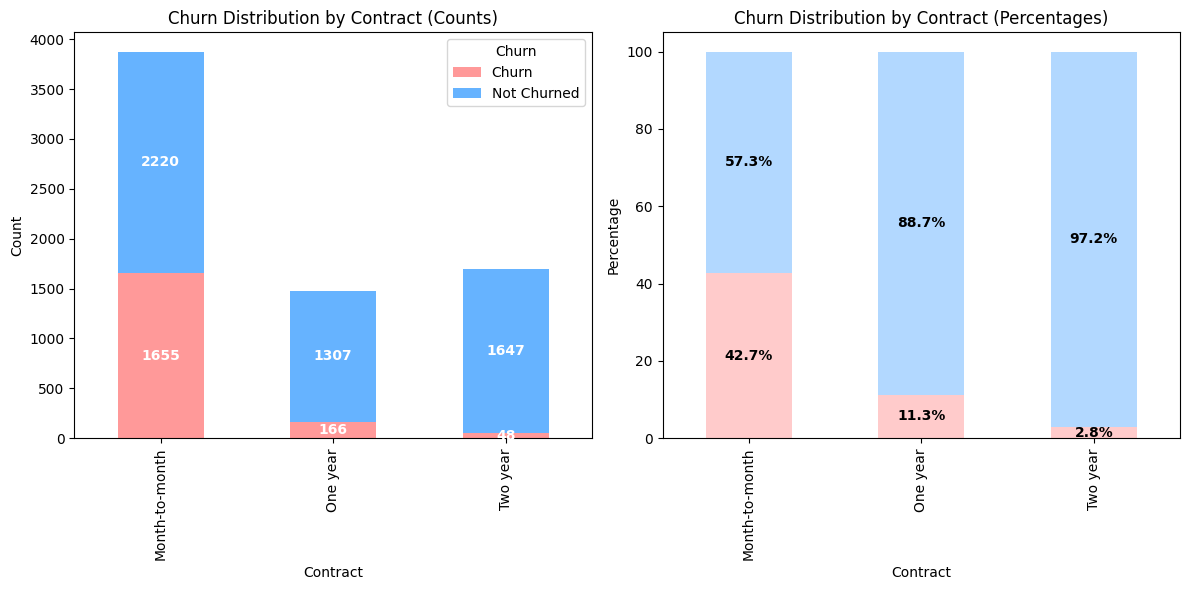

In [21]:
plot_stacked_bar('Contract')

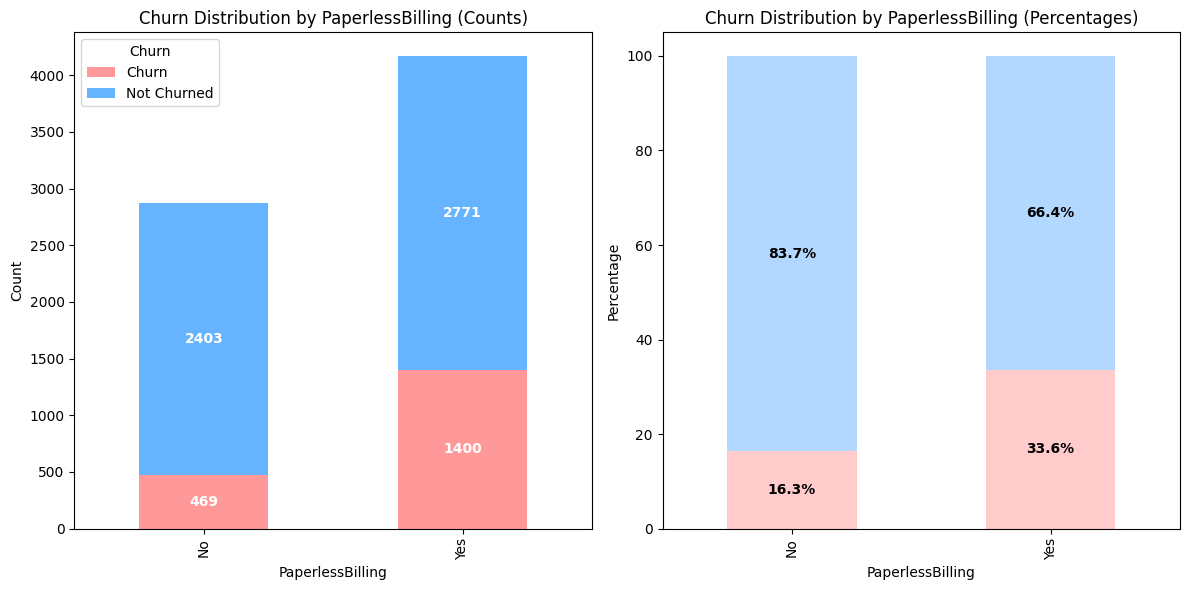

In [22]:
plot_stacked_bar('PaperlessBilling')

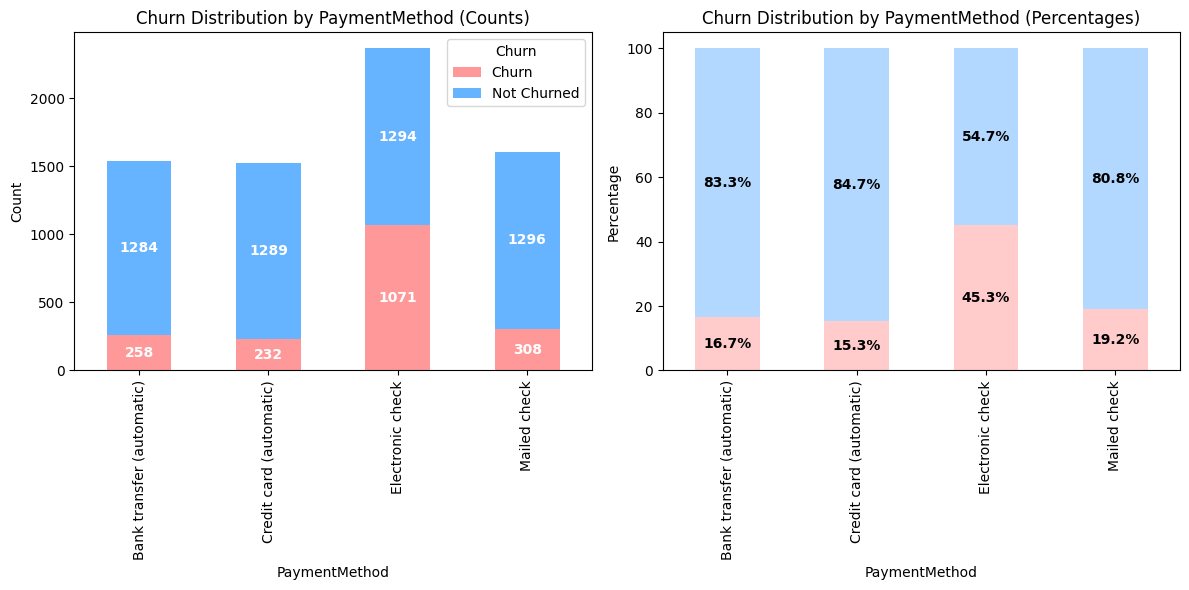

In [35]:
plot_stacked_bar('PaymentMethod')

In [23]:
telecom_data[['MonthlyCharges','TotalCharges']].head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.5
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [24]:
# telecom_data[['MonthlyCharges','TotalCharges']].corr()

'''This line is throwing an error suggesting that the column TotalCharges contains values that are non numeric.'''

'This line is throwing an error suggesting that the column TotalCharges contains values that are non numeric.'

In [25]:
telecom_data['originalTotalCharges'] = telecom_data['TotalCharges']
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'],errors='coerce')

In [26]:
telecom_data[telecom_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,originalTotalCharges
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,Not Churned,
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,Not Churned,
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,Not Churned,
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,Not Churned,
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,Not Churned,
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,Not Churned,
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,Not Churned,
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,Not Churned,
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,Not Churned,
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,Not Churned,


So we can observe that these are missing values in the data however it got missed in the initial step for checking missing values as it is not NaN but empty strings.

In [27]:
telecom_data[['MonthlyCharges','TotalCharges']].dropna().corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


As the two variables are not correlated that much, we either have to use complex methods for correctly calculating the missing values for total charges. However, very less rows have missing values so removing it from the data won't hamper our model performance that much. So instead of substituting missing values and degrade the quality of data, we will just drop it.

In [28]:
telecom_data.dropna(inplace=True)
telecom_data.drop(columns=['originalTotalCharges'],axis=0,inplace=True)

In [29]:
telecom_data.shape

(7032, 21)

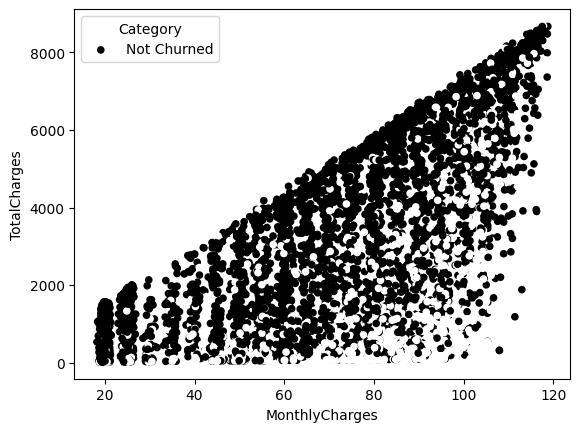

In [30]:
plot = telecom_data.plot(kind="scatter",x='MonthlyCharges',y='TotalCharges',c=telecom_data['Churn'].astype('category').cat.codes,legend=True)

legend_lables = telecom_data['Churn'].unique()
plot.legend(legend_lables,title='Category')

plt.show()

In [31]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
feature_columns = ['SeniorCitizen','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']

In [40]:
data = telecom_data[feature_columns]

In [41]:
data.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,Not Churned
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,Not Churned
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Churn
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,Not Churned
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Churn


In [42]:
data['Churn'].value_counts()

Churn
Not Churned    5163
Churn          1869
Name: count, dtype: int64

In [44]:
data.to_csv('prepared_data.csv',index=False)